In [1]:
from netCDF4 import Dataset
import os

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata


import matplotlib.tri as tri

/home/zmaw/u301513/.conda/envs/oceantracker/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Merging Turbidity data from BAWs Untrim data set with Johannes' SCHISM grid



### BAW data

In [2]:
baw = Dataset('/scratch/local1/baw/f.AZHel_FT_REF.2D.cut.nc', 'r')

In [3]:
_ = [print(item) for item in baw.variables.keys()]

Combined_Mesh2_and_SubMesh2
Mesh2
Mesh2_Schwebstoffklassen_2d
Mesh2_crs
Mesh2_edge_Durchflussflaeche_2d
Mesh2_edge_Gesamtwassertiefe_an_Kanten_2d
Mesh2_edge_Stroemungsgeschwindigkeit_x_R_2d
Mesh2_edge_Stroemungsgeschwindigkeit_y_R_2d
Mesh2_edge_bc
Mesh2_edge_faces
Mesh2_edge_hor_Wassertransport_Kantenflaeche_2d
Mesh2_edge_hor_adv_Salztransport_Kantenflaeche_2d
Mesh2_edge_hor_adv_Schwebstofftransport_Kantenfl_2d
Mesh2_edge_hor_adv_Waermetransport_Kantenflaeche_2d
Mesh2_edge_hor_dif_Salztransport_Kantenflaeche_2d
Mesh2_edge_hor_dif_Schwebstofftransport_Kantenfl_2d
Mesh2_edge_hor_dif_Waermetransport_Kantenflaeche_2d
Mesh2_edge_lat
Mesh2_edge_lat_bnd
Mesh2_edge_lon
Mesh2_edge_lon_bnd
Mesh2_edge_mit_hor_durchstroemte_Kantenflaeche_2d
Mesh2_edge_mittlere_nasse_Laenge_an_Kanten_2d
Mesh2_edge_nasse_Laenge_an_Kanten_2d
Mesh2_edge_nodes
Mesh2_edge_skalare_Stroemungsgeschwindigkeit_2d
Mesh2_edge_x
Mesh2_edge_x_bnd
Mesh2_edge_y
Mesh2_edge_y_bnd
Mesh2_edge_z_edge_2d
Mesh2_edge_z_edge_bnd_2d
Mesh2_f

In [4]:
baw.variables['Mesh2_Schwebstoffklassen_2d']

<class 'netCDF4._netCDF4.Variable'>
|S1 Mesh2_Schwebstoffklassen_2d(nMesh2_suspension_classes, nMesh2_class_names_strlen)
    long_name: Schwebstoffklassen
    name_id: 1704
unlimited dimensions: 
current shape = (6, 80)
filling on, default _FillValue of   used

In [5]:
[print(''.join([byte.decode('utf-8') for byte in baw.variables['Mesh2_Schwebstoffklassen_2d'][ii].data])) for ii in range(6)]

Summe aller Fraktionen                                                          
Very_Fine_Sand                                                                  
Coarse_Silt                                                                     
Medium_Silt                                                                     
Fine_Silt                                                                       
Very_Fine_Silt                                                                  


[None, None, None, None, None, None]

In [6]:
baw_face_x = baw.variables['Mesh2_face_x'][:]
baw_face_y = baw.variables['Mesh2_face_y'][:]

baw_spm = baw.variables['Mesh2_face_Schwebstoffgehalt_2d']

In [7]:
spm = {
    'sum_of_all_classes': baw_spm[:, 0, 0],
    'very_fine_silt': baw_spm[:, 1, 0],
    'fine_silt': baw_spm[:, 2, 0],
    'medium_silt': baw_spm[:, 3, 0],
    'coarse_silt': baw_spm[:, 4, 0],
    'very_fine_sand': baw_spm[:, 5, 0]
}

### HZG data

In [8]:
hzg = Dataset('/scratch/local1/output/22_11_01_depth_losses_v10/22_11_01_depth_losses_v10_grid.nc', 'r')

In [9]:
_ = [print(item) for item in hzg.variables.keys()]

x
triangles
triangle_area
adjacency
node_type
is_boundary_triangle
water_depth


In [10]:

hzg_node_x = hzg.variables['x'][:,0]
hzg_node_y = hzg.variables['x'][:,1]

hzg_tri = hzg.variables['triangles'][:]

## Creating a copy of the HZG dataset with the interpolated SPM values

Created a copy manually with rsync

### Interpolating and merging BAW data onto HZG grid

#### griddata interpolation

In [12]:
!ls path_to_dir2

ls: cannot access 'path_to_dir2': No such file or directory


In [46]:
# list files in path_to_dir2
path_to_dir2 = '/scratch/local1/hzg2'
files = os.listdir(path_to_dir2)
files

['schout_111.nc',
 'schout_156.nc',
 'schout_63.nc',
 'schout_116.nc',
 'schout_113.nc',
 'schout_140.nc',
 'schout_73.nc',
 'schout_91.nc',
 'schout_139.nc',
 'schout_95.nc',
 'schout_158.nc',
 'schout_92.nc',
 'schout_60.nc',
 'schout_2.nc',
 'schout_24.nc',
 'schout_65.nc',
 'schout_155.nc',
 'schout_127.nc',
 'schout_132.nc',
 'schout_47.nc',
 'schout_86.nc',
 'schout_67.nc',
 'schout_149.nc',
 'schout_55.nc',
 'schout_52.nc',
 'schout_33.nc',
 'schout_159.nc',
 'schout_44.nc',
 'schout_82.nc',
 'schout_133.nc',
 'schout_142.nc',
 'schout_3.nc',
 'schout_28.nc',
 'schout_114.nc',
 'schout_87.nc',
 'schout_167.nc',
 'schout_136.nc',
 'schout_144.nc',
 'schout_36.nc',
 'schout_112.nc',
 'schout_166.nc',
 'schout_97.nc',
 'schout_162.nc',
 'schout_101.nc',
 'schout_46.nc',
 'schout_10.nc',
 'schout_88.nc',
 'schout_25.nc',
 'schout_161.nc',
 'schout_77.nc',
 'schout_40.nc',
 'schout_99.nc',
 'schout_14.nc',
 'schout_68.nc',
 'schout_138.nc',
 'schout_9.nc',
 'schout_130.nc',
 'schout_

In [65]:
interpolated_spm = griddata(source_points, source_data, target_points, method='linear')


In [67]:
interpolated_spm.shape

(32432,)

In [69]:
for fraction in spm.keys():
    print(fraction)

    # Create source points from baw data
    source_points = np.array([baw_face_x, baw_face_y]).T

    # Create target grid points from hzg data
    target_points = np.array([hzg_node_x, hzg_node_y]).T

    source_data = spm[fraction]
    source_data = np.mean(source_data, axis=0)

    # Interpolate baw data onto hzg grid
    interpolated_spm = griddata(source_points, source_data, target_points, method='linear')
    # Note: The 'method' argument can be 'linear', 'nearest', or 'cubic'.

    # set 0- where nan
    interpolated_spm[np.isnan(interpolated_spm)] = 0

    break

sum_of_all_classes


In [75]:
df = Dataset('/scratch/local1/hzg2/schout_1.nc')
df.variables.keys()

dict_keys(['time', 'SCHISM_hgrid', 'SCHISM_hgrid_face_nodes', 'SCHISM_hgrid_edge_nodes', 'SCHISM_hgrid_node_x', 'SCHISM_hgrid_node_y', 'node_bottom_index', 'SCHISM_hgrid_face_x', 'SCHISM_hgrid_face_y', 'ele_bottom_index', 'SCHISM_hgrid_edge_x', 'SCHISM_hgrid_edge_y', 'edge_bottom_index', 'depth', 'sigma', 'dry_value_flag', 'coordinate_system_flag', 'minimum_depth', 'sigma_h_c', 'sigma_theta_b', 'sigma_theta_f', 'sigma_maxdepth', 'Cs', 'wetdry_elem', 'zcor', 'elev', 'bottom_stress', 'vertical_velocity', 'temp', 'salt', 'diffusivity', 'TKE', 'hvel', 'ECO_no3', 'ECO_nh4', 'ECO_pho', 'ECO_sil', 'ECO_oxy', 'ECO_fla', 'ECO_dia', 'ECO_bg', 'ECO_bgchl', 'ECO_diachl', 'ECO_flachl', 'ECO_microzoo', 'ECO_mesozoo', 'ECO_det', 'ECO_opa', 'ECO_dom', 'ECO_sed1', 'ECO_sed2', 'ECO_sed3'])

In [84]:
hvel = df.variables['hvel'][:].mean(axis=(0,2))
vvel = df.variables['vertical_velocity'][:].mean(axis=(0,2))


In [86]:
abs_vel = np.sqrt(hvel[:,0]**2 + hvel[:,1]**2 + vvel**2)

(32432,)

mean: 2.8111700789437035e-06


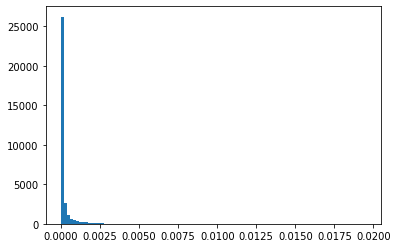

In [98]:
_ = plt.hist(np.abs(vvel), bins=100)
print(f'mean: {np.abs(np.mean(vvel))}')

mean: [0.18377761264280942 0.07844227400434539 0.2907873680321962 ...
 0.0012463646820137194 0.0 0.0]


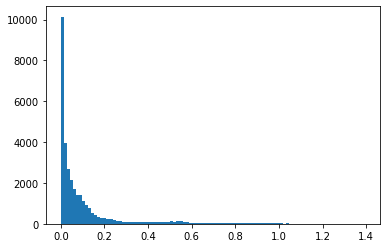

In [96]:
out = plt.hist(np.sqrt(hvel[:,0]**2 + hvel[:,1]**2), bins=100)
print(f'mean: {np.sqrt(hvel[:,0]**2 + hvel[:,1]**2)}')

mean: 0.10899244158355256


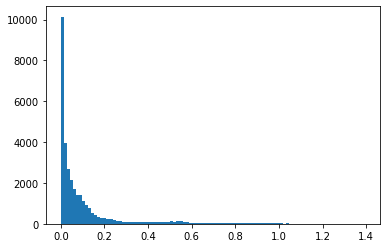

In [90]:
%matplotlib inline


plt.hist(abs_vel,bins=100)
print(f'mean: {abs_vel.mean()}')

mean: 0.004153793680176542


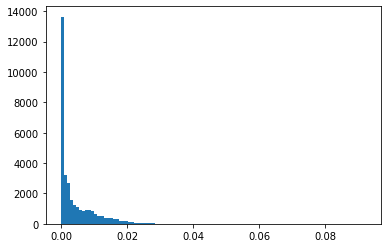

In [92]:
diff = df.variables['diffusivity'][:].mean(axis=(0,2))

plt.hist(diff,bins=100)
print(f'mean: {diff.mean()}')


In [105]:
df.variables['hvel'][:].mean(axis=(0)).shape

(32432, 21, 2)

mean: 0.009471117619907946


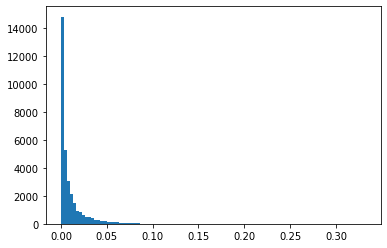

In [110]:
# calculate the difference between adjecent nodes vertically (axis=1)
sheer = np.diff(df.variables['hvel'][:].mean(axis=(0)), axis=1)
sheer = sheer.mean(axis=1)
sheer = np.sqrt(sheer[:,0]**2 + sheer[:,1]**2)

plt.hist(sheer, bins=100)
print(f'mean: {sheer.mean()}')

In [100]:
df.variables['hvel'][:].mean(axis=(0)).diff(axis=1)

AttributeError: 'MaskedArray' object has no attribute 'diff'

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
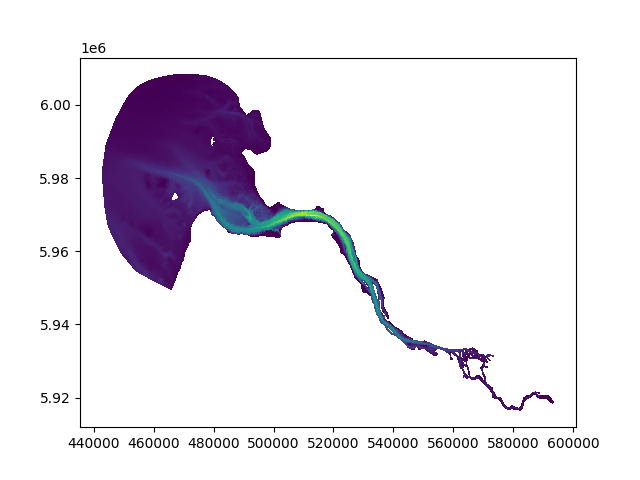

In [72]:
plt.figure()
plt.tripcolor(hzg_node_x, hzg_node_y, hzg_tri, interpolated_spm)
plt.show()

In [68]:
for fraction in spm.keys():
    print(fraction)

    # Create source points from baw data
    source_points = np.array([baw_face_x, baw_face_y]).T

    # Create target grid points from hzg data
    target_points = np.array([hzg_node_x, hzg_node_y]).T

    source_data = spm[fraction]
    source_data = np.mean(source_data, axis=0)

    # Interpolate baw data onto hzg grid
    interpolated_spm = griddata(source_points, source_data, target_points, method='linear')
    # Note: The 'method' argument can be 'linear', 'nearest', or 'cubic'.

    # set 0- where nan
    interpolated_spm[np.isnan(interpolated_spm)] = 0
   

    path_to_dir2 = '/scratch/local1/hzg2'

    for root, dirs, files in os.walk(path_to_dir2):
        n_files = len(files)
        for ii,momo in enumerate(sorted(files)):
            if momo.endswith('.nc'):
                print(momo, f'( {ii+1} / {n_files} )')
                with Dataset(os.path.join(root, momo), 'a') as ds:
                    # Ensure the dimension exists
                    if 'nSCHISM_hgrid_node' not in ds.dimensions:
                        raise ValueError("The dimension 'nSCHISM_hgrid_node' does not exist in the file.")

                    # if not, create it
                    # if f'spm_{fraction}' not in ds.variables:
                    #     spm_var = ds.createVariable(f'spm_{fraction}', 'f4', ('nSCHISM_hgrid_node',))

                    # get the variable
                    spm_var = ds.variables[f'spm_{fraction}']

                    # Assign the turbidity data to the variable
                    spm_var[:] = interpolated_spm

                    # If needed, set attributes for the turbidity variable
                    spm_var.units = 'kg/l'  # Adjust this as necessary
                    spm_var.long_name = f'Suspended sediment concentration of {fraction}'
                    # add description
                    spm_var.description = 'Suspended sediment concentration based on BAWs UnTrim model using the Dietrich model received from Arne Hammrich. Average of 3D data over time and depth'


    

sum_of_all_classes
schout_1.nc ( 2 / 168 )


OSError: [Errno -101] NetCDF: HDF error: b'/scratch/local1/hzg2/schout_1.nc'

In [49]:
df = Dataset('/scratch/local1/hzg2/schout_1.nc', 'r')

In [50]:
df.variables.keys()

dict_keys(['time', 'SCHISM_hgrid', 'SCHISM_hgrid_face_nodes', 'SCHISM_hgrid_edge_nodes', 'SCHISM_hgrid_node_x', 'SCHISM_hgrid_node_y', 'node_bottom_index', 'SCHISM_hgrid_face_x', 'SCHISM_hgrid_face_y', 'ele_bottom_index', 'SCHISM_hgrid_edge_x', 'SCHISM_hgrid_edge_y', 'edge_bottom_index', 'depth', 'sigma', 'dry_value_flag', 'coordinate_system_flag', 'minimum_depth', 'sigma_h_c', 'sigma_theta_b', 'sigma_theta_f', 'sigma_maxdepth', 'Cs', 'wetdry_elem', 'zcor', 'elev', 'bottom_stress', 'vertical_velocity', 'temp', 'salt', 'diffusivity', 'TKE', 'hvel', 'ECO_no3', 'ECO_nh4', 'ECO_pho', 'ECO_sil', 'ECO_oxy', 'ECO_fla', 'ECO_dia', 'ECO_bg', 'ECO_bgchl', 'ECO_diachl', 'ECO_flachl', 'ECO_microzoo', 'ECO_mesozoo', 'ECO_det', 'ECO_opa', 'ECO_dom', 'ECO_sed1', 'ECO_sed2', 'ECO_sed3', 'spm_sum_of_all_classes', 'spm_very_fine_silt', 'spm_fine_silt', 'spm_medium_silt', 'spm_coarse_silt', 'spm_very_fine_sand'])

In [57]:
df.variables['spm_sum_of_all_classes'][:].

(32432,)

In [64]:
df.variables['spm_medium_silt'][:]

masked_array(data=[0.00617701, 0.00617701, 0.00617701, ..., 0.00617701,
                   0.00617701, 0.00617701],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
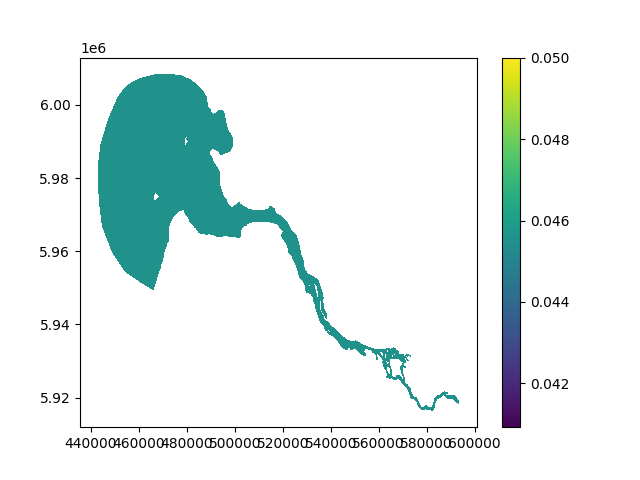

In [63]:
%matplotlib widget
plt.tripcolor(hzg_node_x, hzg_node_y, hzg_tri, df.variables['spm_sum_of_all_classes'][:])
plt.colorbar()

In [ ]:
    path_to_dir2 = '/scratch/local1/hzg2'

    for root, dirs, files in os.walk(path_to_dir2):
        n_files = len(files)
        for ii,momo in enumerate(sorted(files)):
            if momo.endswith('.nc'):
                print(momo, f'( {ii+1} / {n_files} )')
                with Dataset(os.path.join(root, momo), 'a') as ds:
                    # delete "tubidity" variable

In [28]:
df = Dataset('/scratch/local1/hzg2/schout_272.nc')
df.close()

In [30]:
# am I allowed to modify the file
file = '/scratch/local1/hzg2/schout_272.nc'

import os
import stat

# Get current file permissions
current_permissions = stat.S_IMODE(os.lstat(file).st_mode)

# add write permissions for all
new_permissions = current_permissions | stat.S_IWOTH


In [31]:
new_permissions

294

In [25]:
interpolated_spm.shape

NameError: name 'interpolated_spm' is not defined

In [19]:
spm[fraction].shape

(145, 139208)

In [23]:
baw.variables['Mesh2_face_Schwebstoffgehalt_2d']

<class 'netCDF4._netCDF4.Variable'>
float32 Mesh2_face_Schwebstoffgehalt_2d(nMesh2_data_time, nMesh2_suspension_classes, nMesh2_layer_2d, nMesh2_face)
    long_name: Schwebstoffgehalt [ face ]
    units: kg m-3
    name_id: 7
    _FillValue: 1e+31
    ancillary_variables: Mesh2_face_Gesamtwassertiefe_2d SubMesh2_face_SubPolygon_Maske_2d
    cell_measures: volume: Mesh2_face_Wasservolumen_2d area: Mesh2_face_Wasserflaeche_2d
    cell_methods: nMesh2_data_time: point nMesh2_suspension_classes: point nMesh2_layer_2d: mean nMesh2_face: mean
    comment: ancillary variables may be used for visualization and data analysis as threshold and plot subgrid mask
    coordinates: Mesh2_face_lon Mesh2_face_lat Mesh2_face_x Mesh2_face_y Mesh2_face_z_face_2d Mesh2_Schwebstoffklassen_2d
    grid_mapping: Mesh2_crs
    standard_name: concentration_of_suspended_matter_in_sea_water
    mesh: Mesh2
    location: face
unlimited dimensions: nMesh2_data_time
current shape = (145, 6, 1, 139208)
filling on

In [21]:


# Define your turbidity data - for this example, I'm just creating dummy data.
# In reality, you should replace this with your actual turbidity data.




schout_272.nc ( 1 / 367 )
schout_111.nc ( 2 / 367 )
schout_199.nc ( 3 / 367 )
schout_197.nc ( 4 / 367 )
schout_156.nc ( 5 / 367 )
schout_171.nc ( 6 / 367 )
schout_63.nc ( 7 / 367 )
schout_116.nc ( 8 / 367 )
schout_252.nc ( 9 / 367 )
schout_113.nc ( 10 / 367 )
schout_294.nc ( 11 / 367 )
schout_140.nc ( 12 / 367 )
schout_73.nc ( 13 / 367 )
schout_91.nc ( 14 / 367 )
schout_350.nc ( 15 / 367 )
schout_185.nc ( 16 / 367 )
schout_139.nc ( 17 / 367 )
schout_95.nc ( 18 / 367 )
schout_179.nc ( 19 / 367 )
schout_158.nc ( 20 / 367 )
schout_92.nc ( 21 / 367 )
schout_354.nc ( 22 / 367 )
schout_321.nc ( 23 / 367 )
schout_285.nc ( 24 / 367 )
schout_60.nc ( 25 / 367 )
schout_2.nc ( 26 / 367 )
schout_284.nc ( 27 / 367 )
schout_307.nc ( 28 / 367 )
schout_226.nc ( 29 / 367 )
schout_24.nc ( 30 / 367 )
schout_65.nc ( 31 / 367 )
schout_250.nc ( 32 / 367 )
schout_155.nc ( 33 / 367 )
schout_127.nc ( 34 / 367 )
schout_132.nc ( 35 / 367 )
schout_175.nc ( 36 / 367 )
schout_47.nc ( 37 / 367 )
schout_86.nc ( 38 / 3

In [123]:
df = Dataset('/scratch/local1/spm/f.IZHel_u09_024_val2_netcdf.2D.cut.nc')
# df.variables.keys()

_ = [print(item) for item in df.variables.keys()]


Mesh2_node_x
Mesh2_node_y
Mesh2_face_x
Mesh2_face_y
Mesh2_node_lon
Mesh2_node_lat
Mesh2_face_lon
Mesh2_face_lat
nMesh2_time
nMesh2_time_bnd
Mesh2_crs
Mesh2_edge_bc
Mesh2_edge_x
Mesh2_edge_y
Mesh2_edge_x_bnd
Mesh2_edge_y_bnd
Mesh2_edge_lon
Mesh2_edge_lat
Mesh2_edge_lon_bnd
Mesh2_edge_lat_bnd
Mesh2_face_x_bnd
Mesh2_face_y_bnd
Mesh2_face_lon_bnd
Mesh2_face_lat_bnd
Mesh2_face_center_x
Mesh2_face_center_y
Mesh2_face_center_lon
Mesh2_face_center_lat
Mesh2_edge_nodes
Mesh2_edge_faces
Mesh2_face_nodes
Mesh2_face_edges
Mesh2_face_colour
Mesh2_face_bc
Mesh2_mean_grid_lat
SubMesh2_face_x
SubMesh2_face_y
SubMesh2_face_x_bnd
SubMesh2_face_y_bnd
SubMesh2_face_lon
SubMesh2_face_lat
SubMesh2_face_lon_bnd
SubMesh2_face_lat_bnd
SubMesh2_edge_x
SubMesh2_edge_y
SubMesh2_edge_x_bnd
SubMesh2_edge_y_bnd
SubMesh2_edge_lon
SubMesh2_edge_lat
SubMesh2_edge_lon_bnd
SubMesh2_edge_lat_bnd
SubMesh2_face_contact
SubMesh2_edge_contact
Mesh2
SubMesh2
Combined_Mesh2_and_SubMesh2
Mesh2_face_Schwebstoffgehalt_2d
Mesh2_fac

In [128]:
df.variables['dmqs_method'][:]

''.join([byte.decode('utf-8') for byte in df.variables['dmqs_method'][0].data])

'/net/themis/system/akprog/bin/i18/untrim2009_2020_01_16.i18 (P_UTROMP2009_UI, Version = 4.6, Datum = 01/10/19)                                                                                                                                  '

In [113]:

# print all keys with "schweb" in it
[print(item) for item in df.variables.keys() if 'schweb' in item.lower()]

df.variables['Mesh2_face_Schwebstoffgehalt_2d']


Mesh2_face_Schwebstoffgehalt_2d
Mesh2_Schwebstoffklassen_2d


<class 'netCDF4._netCDF4.Variable'>
float32 Mesh2_face_Schwebstoffgehalt_2d(nMesh2_data_time, nMesh2_suspension_classes, nMesh2_layer_2d, nMesh2_face)
    long_name: Schwebstoffgehalt [ face ]
    units: kg m-3
    name_id: 7
    _FillValue: 1e+31
    ancillary_variables: Mesh2_face_Gesamtwassertiefe_2d SubMesh2_face_SubPolygon_Maske_2d
    cell_measures: volume: Mesh2_face_Wasservolumen_2d area: Mesh2_face_Wasserflaeche_2d
    cell_methods: nMesh2_data_time: point nMesh2_suspension_classes: point nMesh2_layer_2d: mean nMesh2_face: mean
    comment: ancillary variables may be used for visualization and data analysis as threshold and plot subgrid mask
    coordinates: Mesh2_face_lon Mesh2_face_lat Mesh2_face_x Mesh2_face_y Mesh2_face_z_face_2d Mesh2_Schwebstoffklassen_2d
    grid_mapping: Mesh2_crs
    standard_name: concentration_of_suspended_matter_in_sea_water
    mesh: Mesh2
    location: face
unlimited dimensions: nMesh2_data_time
current shape = (17551, 6, 1, 96160)
filling off

In [114]:
# print all keys with time in it
[print(item) for item in df.variables.keys() if 'time' in item.lower()]


nMesh2_time
nMesh2_time_bnd
nMesh2_data_time
dmqs_sim_time_step


[None, None, None, None]

In [121]:
df.variables['nMesh2_time_bnd']

<class 'netCDF4._netCDF4.Variable'>
float64 nMesh2_time_bnd(nMesh2_time, two)
unlimited dimensions: 
current shape = (1, 2)
filling off

In [132]:
df = Dataset('/scratch/local1/hzg2/schout_1.nc')

In [133]:
df.variables['TKE']

<class 'netCDF4._netCDF4.Variable'>
float32 TKE(time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers)
    missing_value: 9.96921e+36
    mesh: SCHISM_hgrid
    data_horizontal_center: node
    data_vertical_center: full
    i23d: 2
    ivs: 1
unlimited dimensions: time
current shape = (24, 32432, 21)
filling on, default _FillValue of 9.969209968386869e+36 used